In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [63]:
# preparing data
dat_file = 'challenge_dataset_vs2_temporarycontracts.csv'
dat = pd.read_csv(dat_file, sep=';', thousands=',')
print dat.head(5)
print dat.tail(5)
print dat.columns
print dat.shape

for col in dat.columns[:-1]:
    print col, dat.groupby(col).size()


  Gender Contracttype  Year  Position University  FTE
0      m         temp  1999  fullprof        LEI    3
1      m         temp  1999  fullprof         UU    9
2      m         temp  1999  fullprof        RUG    3
3      m         temp  1999  fullprof        EUR    2
4      m         temp  1999  fullprof         UM    3
     Gender Contracttype  Year  Position University         FTE
3019      f         perm  2015  supstaff        TUD  7785123684
3020      f         perm  2015  supstaff        TUE      442018
3021      f         perm  2015  supstaff         UT       48183
3022      f         perm  2015  supstaff         WU     4364586
3023      f         perm  2015  supstaff         OU     1263907
Index([u'Gender', u'Contracttype', u'Year', u'Position', u'University',
       u'FTE'],
      dtype='object')
(3024, 6)
Gender Gender
f    1512
m    1512
dtype: int64
Contracttype Contracttype
perm    1512
temp    1512
dtype: int64
Year Year
1999    336
2001    336
2003    336
2005    336
20

                                   FTE      
                                  mean count
Year Contracttype Gender                    
1999 perm         f       1.140833e+02    84
                  m       2.368571e+02    84
     temp         f       5.934524e+01    84
                  m       8.489286e+01    84
2001 perm         f       1.139881e+02    84
                  m       2.210714e+02    84
     temp         f       6.096429e+01    84
                  m       8.838095e+01    84
2003 perm         f       8.282152e+05    84
                  m       1.523565e+06    84
     temp         f       3.587296e+05    84
                  m       3.343856e+05    84
2005 perm         f       8.679574e+05    84
                  m       1.352325e+06    84
     temp         f       3.568024e+05    84
                  m       4.289964e+05    84
2007 perm         f       7.206081e+05    84
                  m       1.318476e+06    84
     temp         f       3.531259e+05    84
          

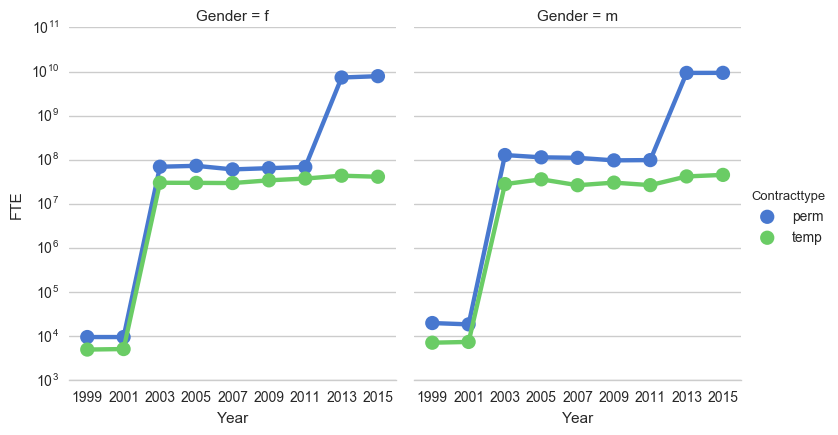

In [118]:
key_columns = ['Year','Contracttype', 'Gender']

print dat[key_columns+['FTE']].groupby(key_columns).agg(['mean','count'])
sum_dat = dat[key_columns+['FTE']].groupby(key_columns, as_index=False).sum()

g = sns.factorplot(x="Year", y="FTE", hue="Contracttype", col="Gender", data=sum_dat,
                   capsize=.2, palette="muted", size=4.5, aspect=.85)
g.fig.get_axes()[0].set_yscale('log')
g.despine(left=True)
plt.show()

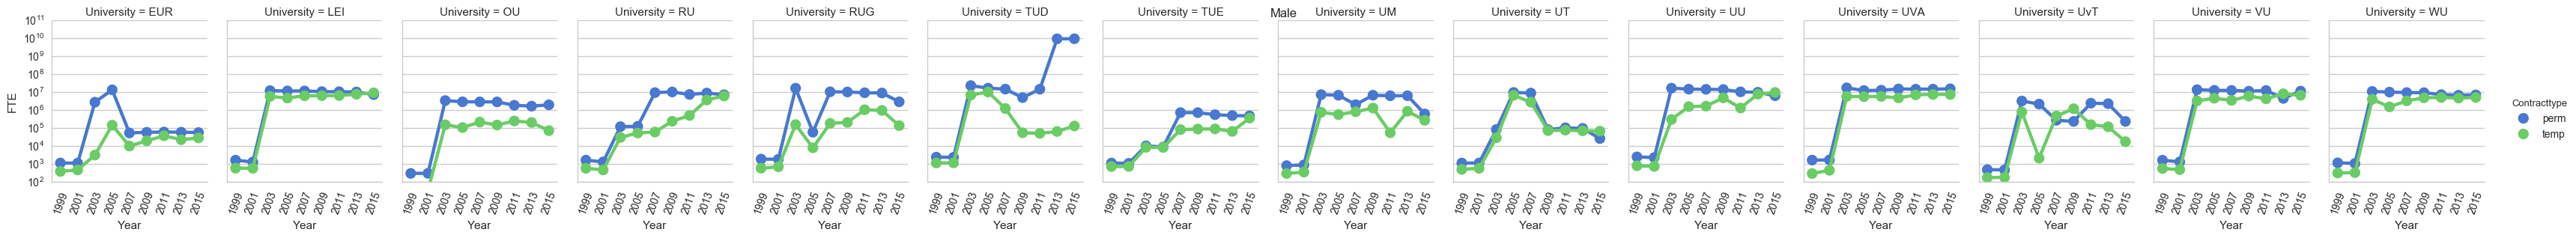

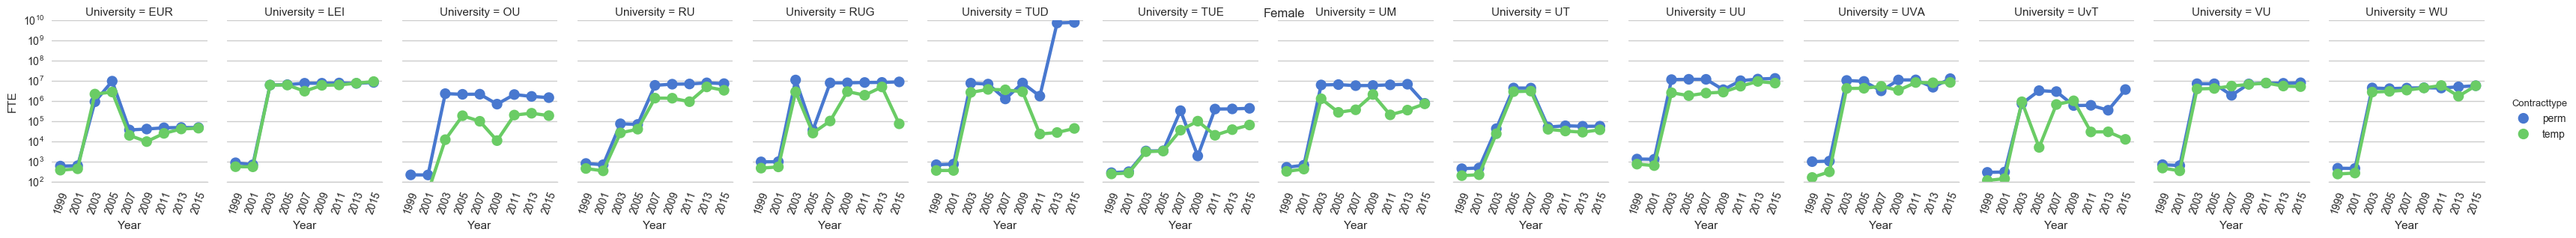

In [151]:
# for each university (and gender)
key_columns = ['Year','Contracttype', 'University']
for i, gender in enumerate(set(dat['Gender'])):
    dat_tmp = dat[dat['Gender']==gender]
    sum_dat = dat_tmp[key_columns+['FTE']].groupby(key_columns, as_index=False).sum()
    g = sns.factorplot(x="Year", y="FTE", hue="Contracttype", col="University", data=sum_dat,
                   capsize=.2, palette="muted", size=3, aspect=.8, col_wrap=14)
    g.fig.get_axes()[0].set_yscale('log')
    g.set_xticklabels(rotation=70)
    if gender == 'f':
        g.fig.suptitle('Female')
    elif gender =='m':
        g.fig.suptitle('Male')
    g.fig.subplots_adjust(top=.925)
g.despine(left=True)
plt.show()

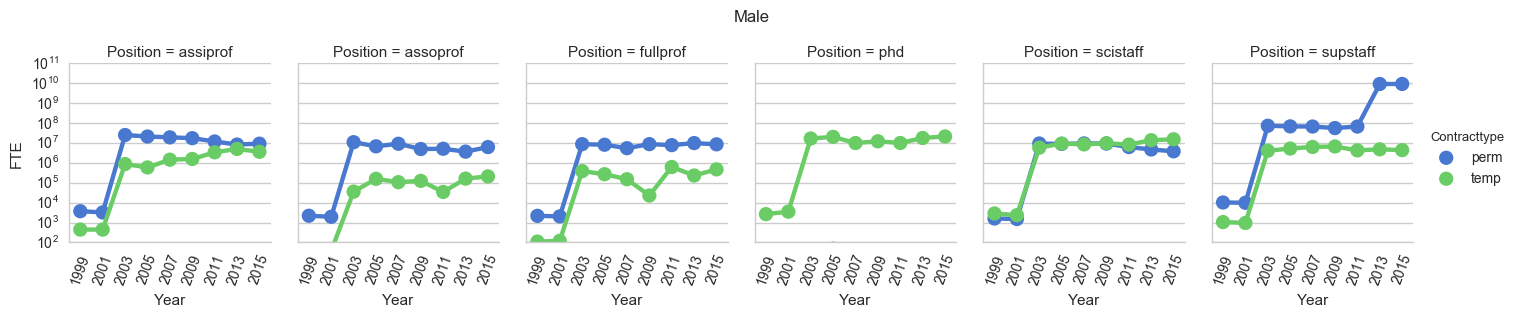

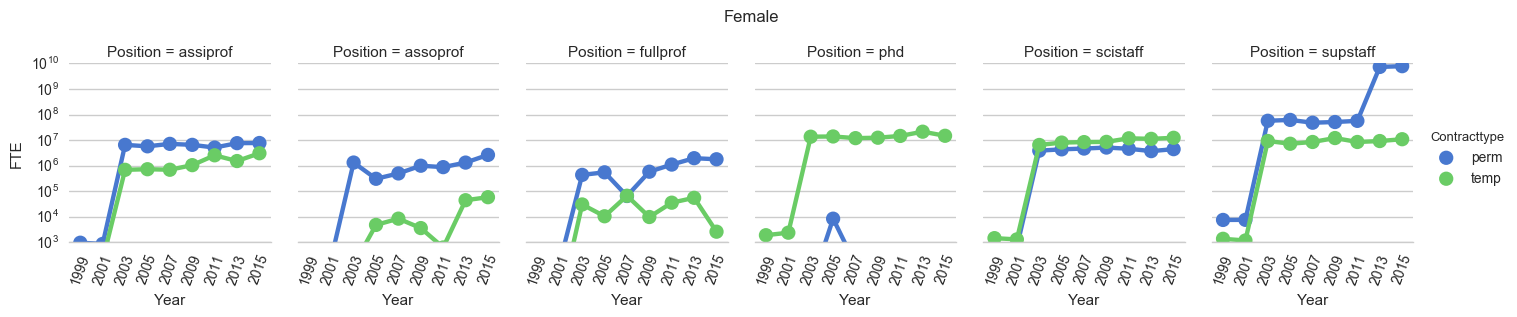

In [150]:
# for each position (and gender)
key_columns = ['Year','Contracttype', 'Position']
for i, gender in enumerate(set(dat['Gender'])):
    dat_tmp = dat[dat['Gender']==gender]
    sum_dat = dat_tmp[key_columns+['FTE']].groupby(key_columns, as_index=False).sum()
    g = sns.factorplot(x="Year", y="FTE", hue="Contracttype", col="Position", data=sum_dat,
                   capsize=.2, palette="muted", size=3, aspect=.8, col_wrap=6)
    g.fig.get_axes()[0].set_yscale('log')
    g.set_xticklabels(rotation=70)
    if gender == 'f':
        g.fig.suptitle('Female')
    elif gender =='m':
        g.fig.suptitle('Male')
    g.fig.subplots_adjust(top=.8)
g.despine(left=True)
plt.show()